In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
import os
print(os.getcwd())  # shows your working folder


c:\Users\ADMIN\Desktop\MY PROJECT\Deployed projects\Breast_Cancer_Prediction_Model\notebooks


In [15]:
data=pd.read_csv(r'C:\Users\ADMIN\Desktop\MY PROJECT\Deployed projects\Breast_Cancer_Prediction_Model\data\raw\Breast_cancer_data.csv')

In [16]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
x=data.drop('diagnosis',axis=1)
y=data['diagnosis']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [22]:
#Logistic regression
logit=LogisticRegression()
logit=logit.fit(x_train,y_train)
y_pred=logit.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9298245614035088
[[40  3]
 [ 5 66]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [23]:
#decision tree
DT=DecisionTreeClassifier()
DT=DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9122807017543859
[[40  3]
 [ 7 64]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.96      0.90      0.93        71

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [24]:
#Random forest
rf=RandomForestClassifier()
rf=rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9473684210526315
[[41  2]
 [ 4 67]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [25]:
#xgboost
xgb=XGBClassifier()
xgb=xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9473684210526315
[[42  1]
 [ 5 66]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        43
           1       0.99      0.93      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [26]:
#feauture importance
importance=rf.feature_importances_
fet_imp=pd.DataFrame(importance,index=x_train.columns,columns=['importance'])
fet_imp.sort_values(by='importance',ascending=False)

,importance
mean_perimeter,0.274952
mean_area,0.246666
mean_radius,0.227655
mean_texture,0.132355
mean_smoothness,0.118372


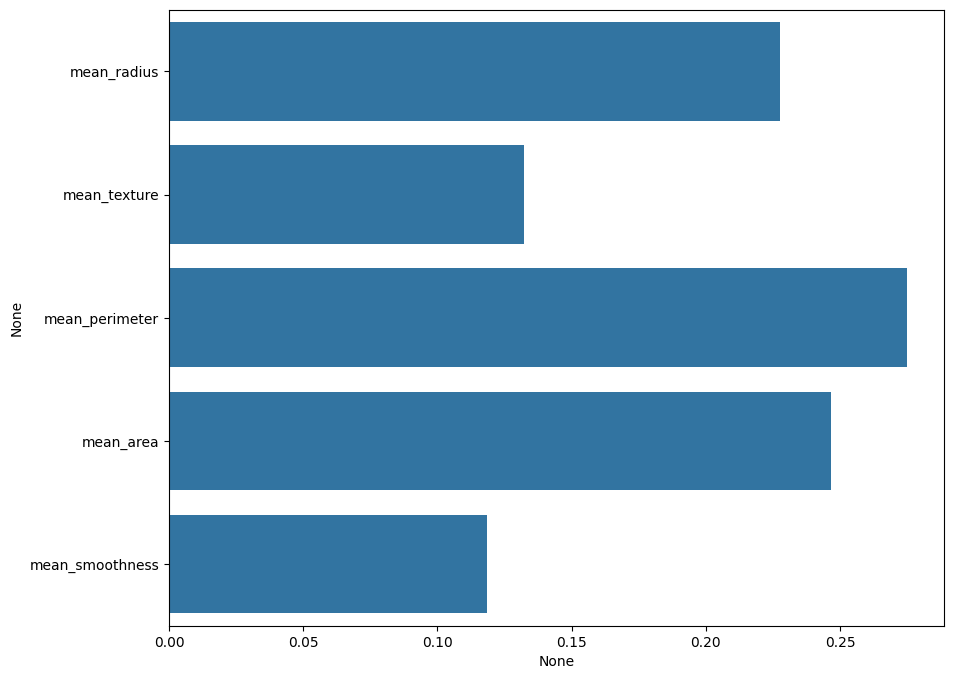

In [27]:
importance=rf.feature_importances_
fet_imp=pd.Series(importance,index=x_train.columns)
fet_imp.sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=fet_imp,y=fet_imp.index)
plt.show()

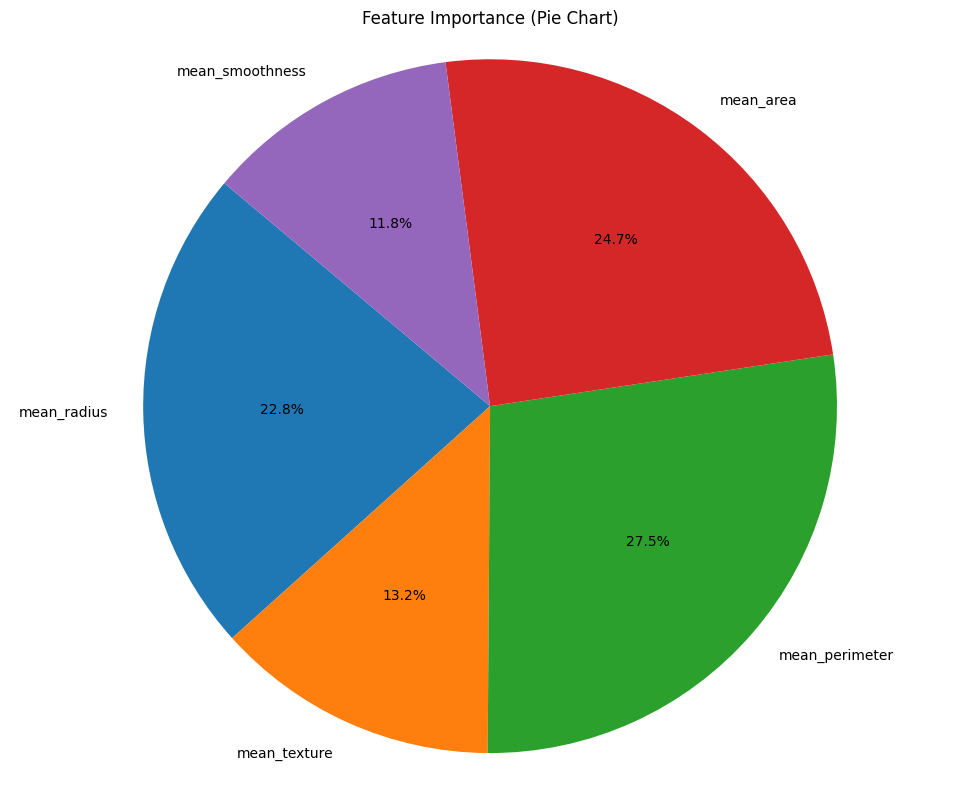

In [28]:
importance=rf.feature_importances_
fet_imp=pd.Series(importance,index=x_train.columns)
fet_imp.sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.pie(fet_imp, labels=fet_imp.index, autopct='%1.1f%%', startangle=140)
plt.title("Feature Importance (Pie Chart)")
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.tight_layout()
plt.show()

In [29]:
import pickle
with open ('breast_cancer.pkl','wb') as model_file:
  pickle.dump(rf,model_file)
print('model file downloaded')

model file downloaded
